# B1.2 Plots with Constant Velocities
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In the following, we will consider motion, or segments of motion, with constant velocity (or zero acceleration).
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B1.2.1 Graphical Representation: Position vs. Time
Imagine we are observing an object moving along a straight line and at certain times we measure the object's position and input them into a table:

| Position (m) | Time (s) |
| ------------ | -------- |
| $ x_0 = 10 $ | $t_0 = 0$ |
| $ x_1 = 20 $ | $t_1 = 1$ |
| $ x_2 = 50 $ | $t_2 = 2$ |
| $ x_3 = 40$ | $t_3 = 3$ |
| $ x_4 = 40 $ | $t_4 = 4$ |
| $ x_5 = 25 $ | $t_5 = 5$ |
| $ x_6 = -10 $ | $t_6 = 6$ |
| $ x_7 = 5 $ | $t_7 = 7$ |

We say that each measurement is an **event**. 

In principle we could have thousands or more events and looking through a table to make sense of the data would be an impossible task. Instead, let us employ Python and plot it:

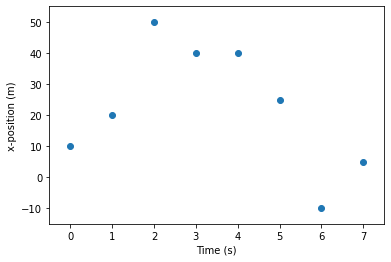

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t = [0,1,2,3,4,5,6,7]
x = [10,20,50,40,40,25,-10,5]

plt.figure()
plt.ylabel('x-position (m)')
plt.xlabel('Time (s)')
ax = plt.gca()
ax.scatter(t,x)
ax.set_xlim([-0.5, np.max(t)+0.5])
ax.set_ylim([np.min(x)-5, np.max(x)+5])
plt.show()

<div class="alert alert-danger">
We may be tempted to connect the data points. However, we have absolutely no knowledge of the position between the measured times, so if we connect the data points, we make some assumption about the position and may lead somebody else to the false conclusion that we have knowledge of the whereabouts when we are not taking a measurements.
</div>

Of course, we often make some qualified guesses based on physics, e.g., if we **assume constant velocity** between the data points, then we can connect the data points by straight line segments.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B1.2.2 Velocity from Position vs. Time Graph

We can attempt to calculate the average velocity as well by calculating the displacement and elapsed time between each event:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t = [0,1,2,3,4,5,6,7]
x = [10,20,50,40,40,25,-10,5]

vx = []
#find the average velocity between events
for i in range(len(t)-1):
    dx = x[i+1] - x[i]   #finding the difference in position between events: displacement
    dt = t[i+1] - t[i]     #finding the elapsed time between events (of course, it is just 1 s in this example)
    
    v = dx/dt
    vx.append(v)
    
print(vx)

[10.0, 30.0, -10.0, 0.0, -15.0, -35.0, 15.0]


In the last step of the code, I asked it to print the values of the calculated average velocities. We notice that we only have 7 average velocities while we have 8 data position data points (8 data points implies 7 intervals). These average velocities are representative of the **average velocities between the measured postions**. How would we plot that? The most appropriate way is to plot the average velocity as horizontal segments spanning the elapsed time intervals:

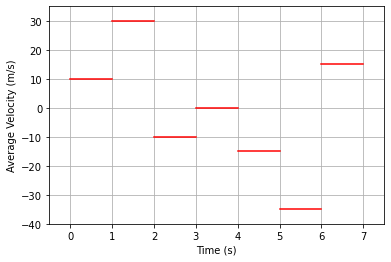

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t = [0,1,2,3,4,5,6,7]
x = [10,20,50,40,40,25,-10,5]

plt.figure()
plt.ylabel('Average Velocity (m/s)')
plt.xlabel('Time (s)')
ax = plt.gca()

vx = []
#find the average velocity between events
for i in range(len(t)-1):
    dx = x[i+1] - x[i]   #finding the difference in position between events: displacement
    dt = t[i+1] - t[i]     #finding the elapsed time between events (of course, it is just 1 s in this example)
    
    v = dx/dt
    vx.append(v)
    
    ax.plot([t[i],t[i+1]],[v,v],color = 'r')
    
ax.set_xlim([-0.5, np.max(t)+0.5])
ax.set_ylim([np.min(vx)-5, np.max(vx)+5])
ax.grid()
plt.show()

Let us try and put these two plots on the same "page" and connect the position data points with stright segments (we are now assuming a constant velocity between the two):

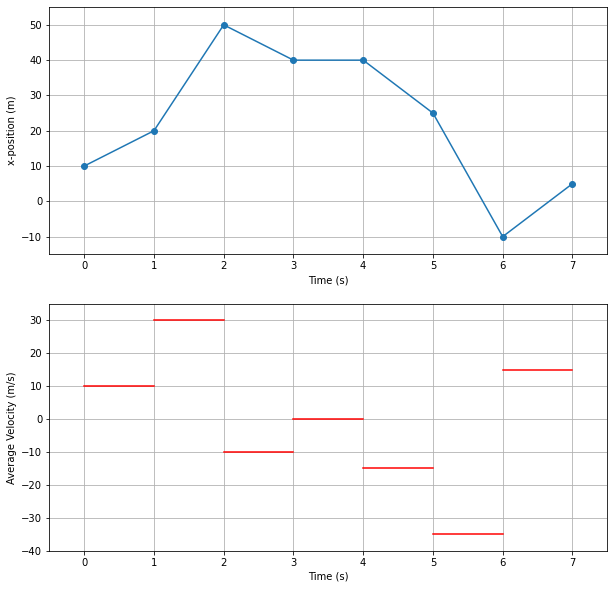

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t = [0,1,2,3,4,5,6,7]
x = [10,20,50,40,40,25,-10,5]

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))

ax1.set(ylabel='x-position (m)', xlabel='Time (s)')

ax1.plot(t,x,'-o')
ax1.set_xlim([-0.5, np.max(t)+0.5])
ax1.set_ylim([np.min(x)-5, np.max(x)+5])
ax1.grid()

ax2.set(ylabel='Average Velocity (m/s)',xlabel='Time (s)')

vx = []
#find the average velocity between events
for i in range(len(t)-1):
    dx = x[i+1] - x[i]   #finding the difference in position between events: displacement
    dt = t[i+1] - t[i]     #finding the elapsed time between events (of course, it is just 1 s in this example)
    
    v = dx/dt
    vx.append(v)
    
    ax2.plot([t[i],t[i+1]],[v,v],color = 'r')
    
ax2.set_xlim([-0.5, np.max(t)+0.5])
ax2.set_ylim([np.min(vx)-5, np.max(vx)+5])
ax2.grid()
plt.show()

The observant student may recognize that the average velocity across a time interval is the equivalent of the slope of the corresponding segment in the position vs time graph. This is a direct consequence of the definition:

$$ v_{av,x} = \frac{\Delta x}{\Delta t} $$

as it is the same as *rise over run*. 

<div class="alert alert-success">
The average slope between two data points of the position vs. time graph is the average velocity between the two points.
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B1.2.3 Displacement from Velocity vs. Time Graph

Let us consider the velocity vs. time graph in more detail. In the plot below, the zero-velocity line is emphasized. In addition, the focus will be on the rectangle shown. 

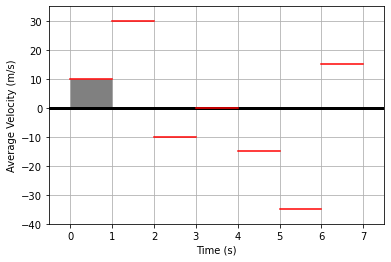

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

t = [0,1,2,3,4,5,6,7]
x = [10,20,50,40,40,25,-10,5]

plt.figure()
plt.ylabel('Average Velocity (m/s)')
plt.xlabel('Time (s)')
ax = plt.gca()
ax.axhline(y=0, xmin=0.0, xmax=7, color='k', linewidth=3)

vx = []
#find the average velocity between events
for i in range(len(t)-1):
    dx = x[i+1] - x[i]   #finding the difference in position between events: displacement
    dt = t[i+1] - t[i]     #finding the elapsed time between events (of course, it is just 1 s in this example)
    
    v = dx/dt
    vx.append(v)
    
    ax.plot([t[i],t[i+1]],[v,v],color = 'r')
    
ax.add_patch(Rectangle((0, 0), 1, 10, color='grey'))
ax.set_xlim([-0.5, np.max(t)+0.5])
ax.set_ylim([np.min(vx)-5, np.max(vx)+5])
ax.grid()
plt.show()

The area of the rectangle is

$$ \textrm{Area} = (1~\textrm{s})(10~\textrm{m/s}) = +10~\textrm{m} $$

The rectangle has unit of meter and we recognize that the numeric value corresponds to the **displacement** on the position vs. time graph. This may not be a complete surprise as we have

$$ \Delta x = v\Delta t $$

which is exactly the calculation for the area above. Similarly, the rectangel spanning from 1 s to 2 s will give a displacement of +30 m in agreement with the position vs. time graph. 

In general, we have

<div class="alert alert-success">
    
The area bound by the velocity vs. time graph and the time axis at v = 0 is the displacement.
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 1</b><br>
    
Consider the graph below, determine the average velocity for the following time intervals: 
    
1. 0-5 s
2. 5-10 s
3. 10-15 s
4. 15-20 s
   
</div>

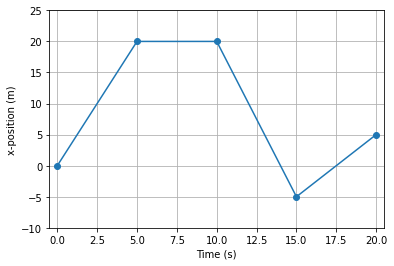

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t = [0,5,10,15,20]
px = [0,20,20,-5,5]

plt.figure()
plt.ylabel('x-position (m)')
plt.xlabel('Time (s)')
ax = plt.gca()
ax.plot(t,px,'-o')
ax.set_xlim([-0.5, np.max(t)+0.5])
ax.set_ylim([np.min(px)-5, np.max(px)+5])
ax.grid()
plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 2</b><br>
    
In your own words, explain how you would find the average velocity from a position vs. time graph and the displacement from a velocity vs. time graph
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 3</b><br>
    
If a segment on a position vs. time graph is flat (horizontal), then the object must be at rest?
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 4</b><br>
    
With respect to a given coordinate system, a segment of the position vs. time graph has a negative slope. Does this imply that the velocity is negative and that the object is moving in a negative direction? 
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 5</b><br>
    
The velocity vs. time graph tells us about the displacement. Without any other information, can we determine the position as well?
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

We have now seen how the slope of the position vs. time graph represents the average velocity between any given to data points used to calculate the slope. In addition, we also saw how the area bounded by the velocity vs. time graph and the time axis represented the displacement. In the next note, we will see how the acceleration fit into to this picture.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">